# Cycles in time series
One goal of time series analysis is to separate its components in a trend, one or more cycles, and a stochastic component. In this notebook we look for cycles in the data, in other words its seasonality. This notebook is based on ch.8 of Peixeiro's book.

In [1]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
from typing import Union
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### The air passengers dataset

In [2]:
data_url = 'https://raw.githubusercontent.com/marcopeix/TimeSeriesForecastingInPython/refs/heads/master/data/air-passengers.csv'

In [4]:
df = pd.read_csv(data_url)
df.shape

(144, 2)

In [5]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


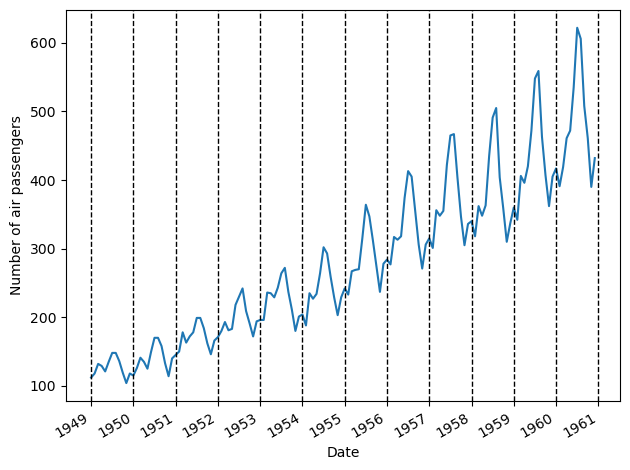

In [10]:
fig, ax = plt.subplots()
ax.plot(df['Month'], df['Passengers'])
for i in np.arange(0, 145, 12):
    ax.axvline(x=i, linestyle='--', color='black', linewidth=1)
ax.set_xlabel('Date')
ax.set_ylabel('Number of air passengers')
plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))
fig.autofmt_xdate()
plt.tight_layout()

### Seasonal decomposition
We use the [STS module](https://www.statsmodels.org/dev/examples/notebooks/generated/stl_decomposition.html) to separate the trend, seasonal, and residual components

In [11]:
decomposition = STL(df['Passengers'], period=12).fit()

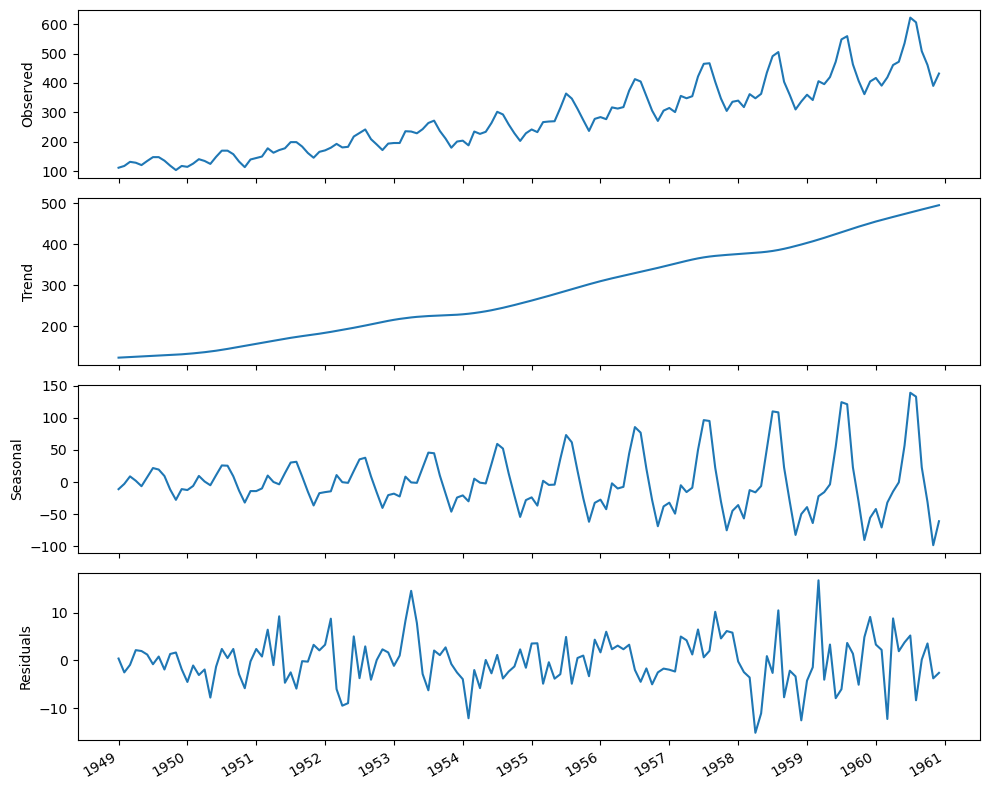

In [12]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10,8))

ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(decomposition.resid)
ax4.set_ylabel('Residuals')

plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))

fig.autofmt_xdate()
plt.tight_layout()